##  Analisis exploratorio de Datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

Considerando que la actividad principal de la empresa se centra en el acceso a internet y tomando en cuenta el KPI planteado, realizaremos una selección de hojas para obtener una visión más integral del mercado de internet en Argentina, asegurando que nuestro análisis esté en sintonía con este objetivo.

In [2]:
#Cargo el archivo
file_path = r'c:\Users\Usuario\Desktop\Repos\Telecomunicaciones_P02\Datasets\Internet.xlsx'

#Cargar las hojas mas relevantes
df_vel_sin_rangos = pd.read_excel(file_path, sheet_name='Velocidad_sin_Rangos') 
df_accesos_por_tecnologia = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')
df_penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')
df_penetracion_totales = pd.read_excel(file_path, sheet_name='Penetracion-totales') 
df_ingresos = pd.read_excel(file_path, sheet_name='Ingresos ')

In [3]:
#Visualizar las primeras filas de cada DataFrame
df_vel_sin_rangos.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [4]:
df_vel_sin_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


In [5]:
df_accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [6]:
df_accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [7]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [8]:
df_penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [9]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [10]:
df_penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [11]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [12]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [13]:
#Verificar el contenido de la columna 'Año' en cada df
for name, df in {'Accesos por velocidad': df_vel_sin_rangos, 
                 'Accesos por tecnología': df_accesos_por_tecnologia, 
                 'Penetración hogares': df_penetracion_hogares, 
                 'Penetración totales': df_penetracion_totales, 
                 'Ingresos': df_ingresos}.items():
    print(f"\nValores únicos en la columna 'Año' para {name}:")
    print(df['Año'].unique())


Valores únicos en la columna 'Año' para Accesos por velocidad:
[2024 2023 2022 2021 2020 2019 2018 2017]

Valores únicos en la columna 'Año' para Accesos por tecnología:
[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']

Valores únicos en la columna 'Año' para Penetración hogares:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración totales:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Ingresos:
[2024 2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [14]:
#Reemplazar 2033 por 2023 en la columna 'Año'
df_ingresos['Año'].replace(to_replace=2033, value=2023, inplace=True)

In [15]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Limpiamos y estandarizamos la columna AÑO.

In [16]:
def limpiar_año(df):
    #Conviertir la columna a string
    df['Año'] = df['Año'].astype(str)
    
    #Eliminar cualquier caracter que no sea numero
    df['Año'] = df['Año'].str.replace(r'\D', '', regex=True)
    
    #Mantener solo los primeros 4 digitos
    df['Año'] = df['Año'].str[:4]

    #Conviertir a numero, reemplazo valores Nan
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

    #Eliminar filas donde 'Año' es Nan
    df = df.dropna(subset=['Año'])

    #Conviertir a entero
    df['Año'] = df['Año'].astype(np.int64)

    return df

In [17]:
#Aplicar la función a cada DataFrame
df_vel_sin_rangos = limpiar_año(df_vel_sin_rangos)
df_accesos_por_tecnologia = limpiar_año(df_accesos_por_tecnologia)
df_penetracion_hogares = limpiar_año(df_penetracion_hogares)
df_penetracion_totales = limpiar_año(df_penetracion_totales)
df_ingresos = limpiar_año(df_ingresos)

In [18]:
#Verificar el contenido de la columna 'Año' en cada df
for name, df in {'Velocidad sin rangos': df_vel_sin_rangos, 
                 'Accesos por tecnología': df_accesos_por_tecnologia, 
                 'Penetración hogares': df_penetracion_hogares, 
                 'Penetración totales': df_penetracion_totales, 
                 'Ingresos': df_ingresos}.items():
    print(f"\nValores únicos en la columna 'Año' para {name}:")
    print(df['Año'].unique())


Valores únicos en la columna 'Año' para Velocidad sin rangos:
[2024 2023 2022 2021 2020 2019 2018 2017]

Valores únicos en la columna 'Año' para Accesos por tecnología:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración hogares:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Penetración totales:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]

Valores únicos en la columna 'Año' para Ingresos:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Normalizar la columna "Ingresos (miles de pesos)"

In [19]:
#Seleccionar la columna 'Ingresos (miles de pesos)'
ingresos_columna = df_ingresos[['Ingresos (miles de pesos)']]

#Inicializar el escalador Min-Max
scaler = MinMaxScaler()

#Ajustar y transformar los datos
df_ingresos['Ingresos_en_pesos'] = scaler.fit_transform(ingresos_columna)

# Verificar el resultado de la normalización
print(df_ingresos[['Ingresos (miles de pesos)', 'Ingresos_en_pesos']].head())
print(df_ingresos.info())

   Ingresos (miles de pesos)  Ingresos_en_pesos
0               4.420322e+08           1.000000
1               3.461990e+08           0.781725
2               1.673760e+08           0.374428
3               1.331066e+08           0.296374
4               1.180603e+08           0.262104
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
 4   Ingresos_en_pesos          42 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB
None


In [20]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos_en_pesos
0,2024,2,4.420322e+08,Abr-Jun 2024,1.000000
1,2024,1,3.461990e+08,Ene-Mar 2024,0.781725
2,2023,4,1.673760e+08,Oct-Dic 2023,0.374428
3,2023,3,1.331066e+08,Jul-Sept 2023,0.296374
4,2023,2,1.180603e+08,Jun-Mar 2023,0.262104


### Nulos

In [21]:
# Eliminar filas con valores nulos
df_vel_sin_rangos = df_vel_sin_rangos.dropna()
df_accesos_por_tecno = df_accesos_por_tecnologia.dropna()
df_penetracion_hogares = df_penetracion_hogares.dropna()
df_penetracion_totales = df_penetracion_totales.dropna()
df_ingresos = df_ingresos.dropna()

### Duplicados

In [22]:
def verifica_duplicados(df, df_name):
    duplicados = df.duplicated()
    num_duplicados = duplicados.sum()
    
    if num_duplicados > 0:
        print(f"El DataFrame '{df_name}' tiene {num_duplicados} registros duplicados.")
    else:
        print(f"El DataFrame '{df_name}' no tiene registros duplicados.")

#Verificar duplicados en cada DataFrame
verifica_duplicados(df_vel_sin_rangos, 'df_vel_sin_rangos')
verifica_duplicados(df_accesos_por_tecnologia, 'df_accesos_por_tecno')
verifica_duplicados(df_penetracion_hogares, 'df_penetracion_hogares')
verifica_duplicados(df_penetracion_totales, 'df_penetracion_totales')
verifica_duplicados(df_ingresos, 'df_ingresos')

El DataFrame 'df_vel_sin_rangos' no tiene registros duplicados.
El DataFrame 'df_accesos_por_tecno' no tiene registros duplicados.
El DataFrame 'df_penetracion_hogares' no tiene registros duplicados.
El DataFrame 'df_penetracion_totales' no tiene registros duplicados.
El DataFrame 'df_ingresos' no tiene registros duplicados.


In [23]:
# Convertir la columna 'Periodo' a tipo fecha en df_penetracion_totales
df_penetracion_totales['Periodo'] = pd.to_datetime(df_penetracion_totales['Periodo'], format='%b-%Y', errors='coerce')


In [24]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
 4   Ingresos_en_pesos          42 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [25]:
#Verificar el contenido de la columna 'Trimestre'
for name, df in { 'Accesos por tecnología': df_accesos_por_tecnologia}.items():
    print(f"\nValores únicos en la columna 'Trimestre' para {name}:")
    print(df['Trimestre'].unique())


Valores únicos en la columna 'Trimestre' para Accesos por tecnología:
[2 1 4 3 '3 *' '2 *' '1 *']


In [26]:
#Limpiar y conviertir la columna 'Trimestre' a tipo int64 en df_accesos_por_tecnologia
#Limpiar primero las cadenas con asteriscos y luego convertimos a int64
df_accesos_por_tecnologia['Trimestre'] = df_accesos_por_tecnologia['Trimestre'].astype(str).str.replace('*', '').astype('int64')

In [27]:
print(df['Trimestre'].unique())

[2 1 4 3]


### Outliers

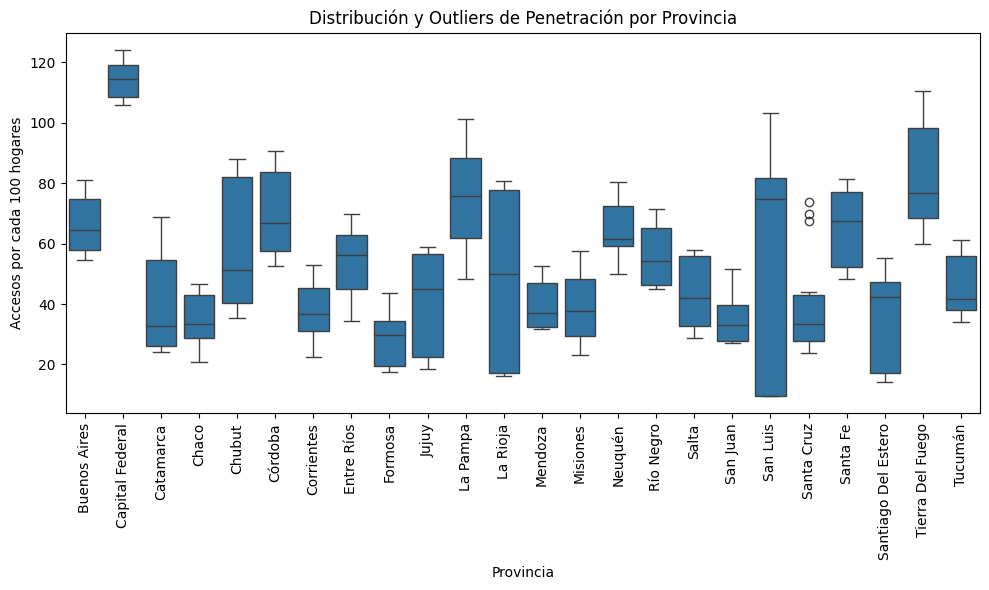

In [28]:
#1. Outliers en penetración de hogares
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_penetracion_hogares)
plt.title('Distribución y Outliers de Penetración por Provincia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Este diagrama de caja y bigotes muestra la distribucion y los valores atipicos de la penetracion de internet por cada 100 hogares en diferentes provincias Argentinas. El grafico muestra que la penetracion de internet es mas alta en Buenos Aires, Capital Federal, Cordoba y Santa Fe con mas de 80 accesos por cada 100 hogares. La penetracion es mas baja en las provincias del norte y sur del pais como Jujuy, Formosa y Santa Cruz con menos de 40 accesos por cada 100 hogares. Continuamos con el analisis que nos permitira abordar estas disparidades y mejorar el acceso a internet.

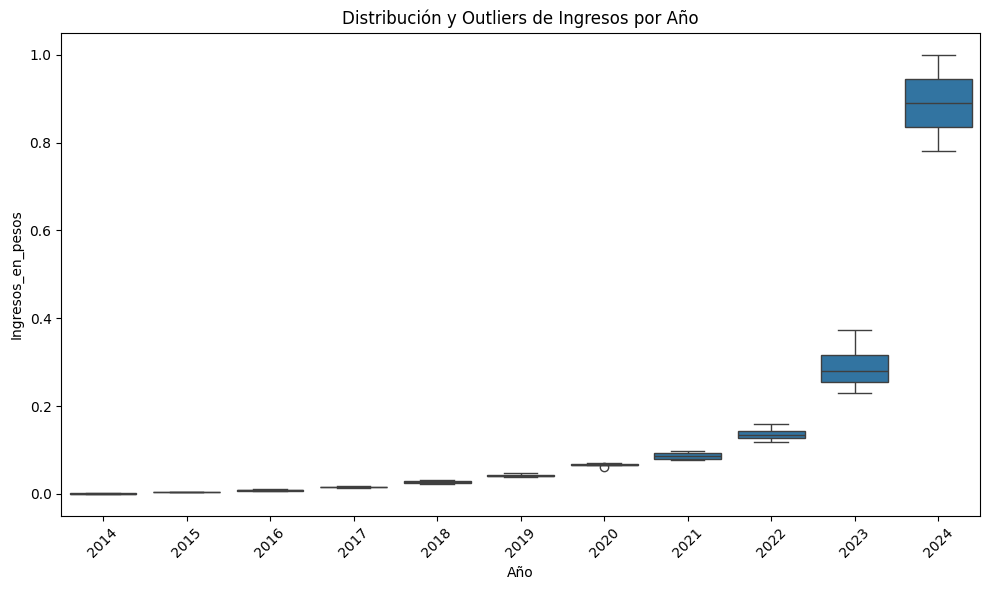

In [29]:
#2. Outliers para ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Ingresos_en_pesos', data=df_ingresos)
plt.title('Distribución y Outliers de Ingresos por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los ingresos han seguido una tendencia ascendente en los últimos años, destacándose especialmente desde 2020, cuando la pandemia de COVID-19 impulsó un notable aumento en la demanda de servicios de internet. Para 2024, se evidencia una variabilidad significativa en los ingresos, lo que sugiere la existencia de valores atípicos. Dado que Argentina ha enfrentado altos niveles de inflación en años recientes, es probable que parte de este crecimiento en los ingresos esté relacionado con ajustes de precios debido a la inflación. Es crucial mantener el análisis para detectar posibles áreas de expansión.

In [30]:
# Análisis de correlación entre ingresos y penetración
df_ingresos_penetracion = pd.merge(df_ingresos, df_penetracion_totales, on='Año')
correlation = df_ingresos_penetracion['Ingresos_en_pesos'].corr(df_ingresos_penetracion['Accesos por cada 100 hab'])

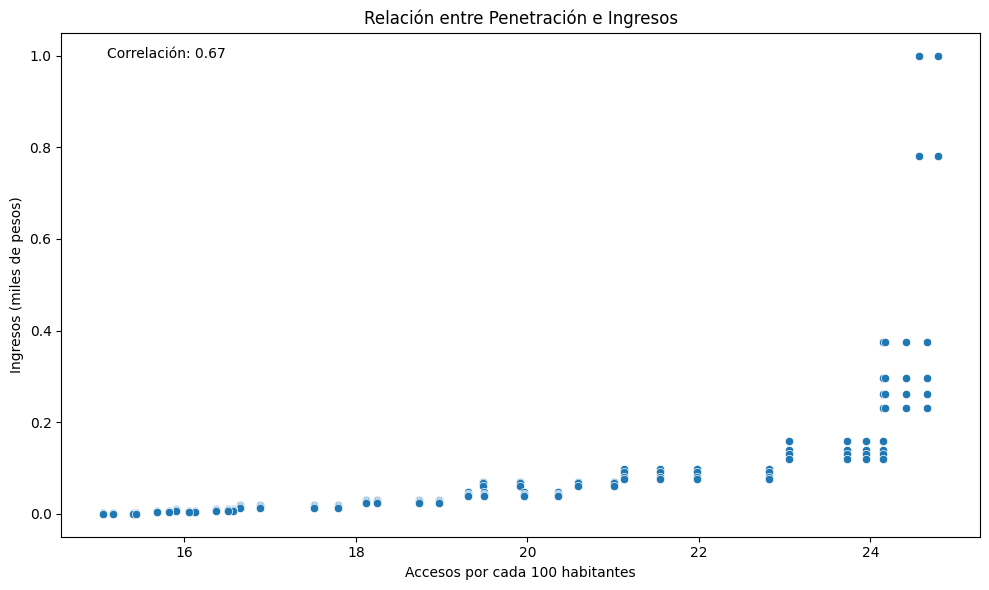

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accesos por cada 100 hab', y='Ingresos_en_pesos', data=df_ingresos_penetracion)
plt.title('Relación entre Penetración e Ingresos')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Ingresos (miles de pesos)')
plt.annotate(f'Correlación: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.tight_layout()
plt.show()

Este gráfico revela una relación positiva entre la penetración de internet y los ingresos, lo que tiene implicaciones clave para la actividad principal, que es el acceso a internet. A medida que la penetración de internet aumenta en una región, hay una tendencia a registrar ingresos más elevados. En general, las áreas con mayor penetración de internet tienden a mostrar un desarrollo económico superior, lo que puede generar un mayor consumo de servicios de internet. No obstante, la alta inflación en el país de Argentina reduce el poder adquisitivo de la población, lo que impacta negativamente en la contratación de servicios de internet. Es crucial tomar medidas para continuar impulsando la penetración de internet, al mismo tiempo que se mitigan los efectos adversos de la situación económica actual.

### Calcular y visualizar las correlaciones entre accesos por cada 100 hogares, velocidad media e ingresos

In [32]:
#Seleccionar las columnas que necesita de cada DataFrame

penetracion = df_penetracion_hogares[['Año', 'Trimestre', 'Accesos por cada 100 hogares']]
ingresos = df_ingresos[['Año', 'Trimestre', 'Ingresos_en_pesos']]

In [33]:
#Seleccionar columnas que necesita
velocidad = df_vel_sin_rangos[['Año', 'Trimestre', 'Provincia', 'Velocidad']]

In [34]:
#Combinar df, primero penetracion y velocidad y luego ingresos
df_combinado = pd.merge(penetracion, velocidad, on=['Año', 'Trimestre'])
df_combinado = pd.merge(df_combinado, ingresos, on=['Año', 'Trimestre'])

In [35]:
#Calcular correlaciones
correlaciones = df_combinado[['Accesos por cada 100 hogares', 'Velocidad', 'Ingresos_en_pesos']].corr()

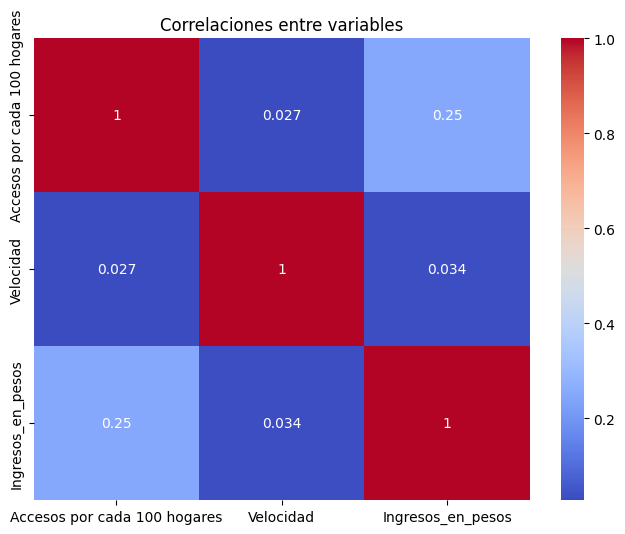

In [36]:
#Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables')
plt.show()

Existe una correlacion moderada entre penetracion de internet y los ingresos lo que sugiere que aumentar la penetracion de internet podria tener un impacto en los ingresos. Por otro lado, la velocidad del servicio no parece tener una relacion significativa ni con la penetracion ni con los ingresos, lo que sugiere que aumentar la velocidad media no necesariamente significa mas accesos o ingresos. 

In [37]:
#Calcular el porcentaje promedio de accesos por año y trimestre
df_accesos_por_tecnologia['Total_Acessos'] = df_accesos_por_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum(axis=1)

#Calcular el porcentaje de cada tecnologia
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    df_accesos_por_tecnologia[f'Porcentaje_{tech}'] = df_accesos_por_tecnologia[tech] / df_accesos_por_tecnologia['Total_Acessos'] * 100

In [38]:
#Calcular el promedio de porcentaje para cada tecnologia
porcentajes_promedio = df_accesos_por_tecnologia[[f'Porcentaje_{tech}' for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]].mean()

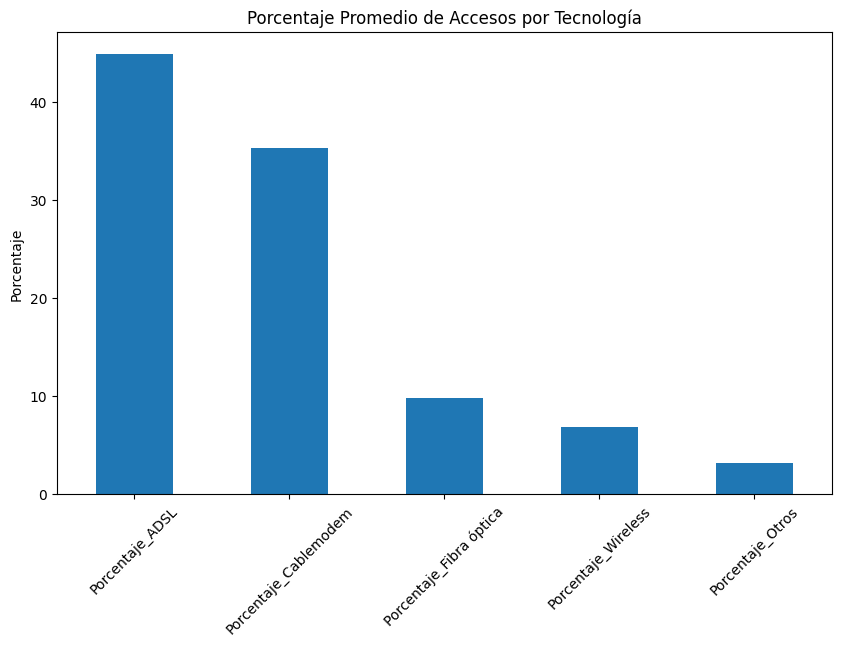

In [39]:
#Crear un grafico de barras
plt.figure(figsize=(10, 6))
porcentajes_promedio.plot(kind='bar')
plt.title('Porcentaje Promedio de Accesos por Tecnología')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()

Esta distribucion muestra que las tecnologias mas tradicionales como ADSL (48% de accesos) y cablecodem (36% de accesos) aun dominan el mercado mientras que la fibra optica esta aun en crecimiento, todavia tiene un margen significativo para expandirse. Esto sugiere un potencial en el crecimiento de la fibra optica lo que generalmente se asocia a mejor calidad de servicio.

In [40]:
#Análizamos la correlacion de los accesos por tecnología 
#Combino DataFrames
df_combined = pd.merge(df_accesos_por_tecnologia, df_penetracion_hogares[['Año', 'Provincia', 'Accesos por cada 100 hogares']], on=['Año', 'Provincia'])
df_combined = pd.merge(df_combined, df_ingresos[['Año', 'Ingresos_en_pesos']], on=['Año'])

In [41]:
#Calculamos las correlaciones
correlaciones = df_combined[['Porcentaje_ADSL', 'Porcentaje_Cablemodem', 'Porcentaje_Fibra óptica', 
                             'Porcentaje_Wireless', 'Porcentaje_Otros', 'Accesos por cada 100 hogares', 
                             'Ingresos_en_pesos']].corr()

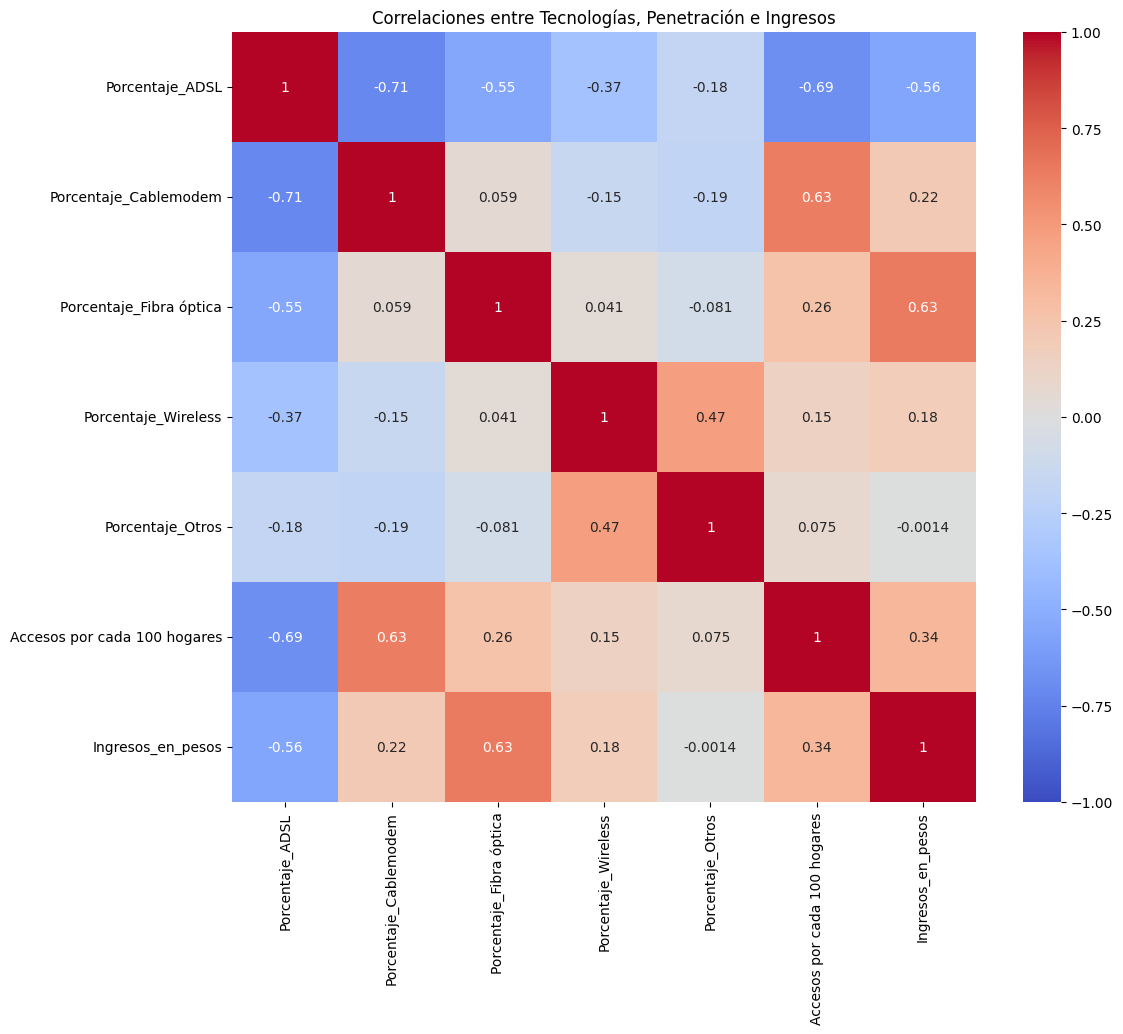

In [42]:
# Visualizamos las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlaciones entre Tecnologías, Penetración e Ingresos')
plt.show()

La fibra óptica presenta la relación más sólida con los ingresos, lo que sugiere un gran potencial para fomentar el crecimiento económico. Por otro lado, el cablemódem también muestra una correlación positiva y ha contribuido al aumento en la penetración de internet. En contraste, el ADSL tiene correlaciones negativas, reflejando el declive de tecnologías más antiguas en favor de alternativas modernas. Estas tecnologías tradicionales, menos eficientes, están siendo reemplazadas por soluciones avanzadas como la fibra óptica, que destaca por su mayor velocidad y capacidad de transmisión. Los usuarios que eligen fibra óptica suelen estar dispuestos a pagar tarifas más altas debido a la calidad del servicio. Dado esto, es fundamental que la empresa considere priorizar la inversión en la expansión de su infraestructura de fibra óptica para potenciar los ingresos y fortalecer su posición competitiva en el mercado.

## Definicion de KPIs
1. KPI: *Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia*
2. KPI: *Aumentar en un 2% el acceso al servicio de internet por fibra óptica para el próximo trimestre*
3. KPI: *Aumentar en un 5% los ingresos por usuario(ARPU) para el próximo trimestre.*

In [43]:
def calcular_kpi(fibra_actual, acceso_anterior):
    #Aplicar la validación
    if acceso_anterior != 0:
        return round((((fibra_actual - acceso_anterior) / acceso_anterior) * 100), 2)
    else:
        return 100  #O cualquier manejo deseado cuando el divisor es cero
df_penetracion_hogares = df_penetracion_hogares.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [44]:
df_accesos_por_tecnologia = df_accesos_por_tecnologia.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [45]:
#Crear la nueva columna con el valor del trimestre anterior en ambos dfs
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].shift(1)
df_accesos_por_tecnologia['Accesos trimestre anterior'] = df_accesos_por_tecnologia.groupby('Provincia')['Fibra óptica'].shift(1)

In [46]:
#Aplicar la fórmula del KPI usando los valores del trimestre anterior
df_penetracion_hogares['KPI'] = df_penetracion_hogares.apply(lambda row: calcular_kpi(row['Accesos por cada 100 hogares'], row['Accesos trimestre anterior']), axis=1)
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares['Accesos trimestre anterior'].fillna(0)
df_penetracion_hogares['KPI'] = df_penetracion_hogares['KPI'].fillna(0)

In [47]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos trimestre anterior,KPI
984,2014,1,Buenos Aires,54.570073,0.000000,0.00
960,2014,2,Buenos Aires,55.061417,54.570073,0.90
936,2014,3,Buenos Aires,56.754739,55.061417,3.08
912,2014,4,Buenos Aires,56.094337,56.754739,-1.16
888,2015,1,Buenos Aires,56.370484,56.094337,0.49


In [48]:
df_accesos_por_tecnologia_KPI = df_accesos_por_tecnologia.drop(columns=['ADSL', 'Cablemodem', 'Wireless', 'Otros', 'Total', 'Total_Acessos', 'Porcentaje_ADSL', 'Porcentaje_Cablemodem', 'Porcentaje_Fibra óptica', 'Porcentaje_Wireless', 'Porcentaje_Otros'])

In [49]:
#Aplicar la fórmula del KPI usando los valores del trimestre anterior
df_accesos_por_tecnologia_KPI['KPI'] = df_accesos_por_tecnologia_KPI.apply(lambda row: calcular_kpi(row['Fibra óptica'], row['Accesos trimestre anterior']), axis=1)
df_accesos_por_tecnologia_KPI['Accesos trimestre anterior'] = df_accesos_por_tecnologia_KPI['Accesos trimestre anterior'].fillna(0)
df_accesos_por_tecnologia_KPI['KPI'] = df_accesos_por_tecnologia_KPI['KPI'].fillna(0)

In [50]:
df_accesos_por_tecnologia_KPI['Accesos trimestre anterior'] = df_accesos_por_tecnologia_KPI['Accesos trimestre anterior'].round(2)
df_accesos_por_tecnologia['Accesos trimestre anterior'] = df_accesos_por_tecnologia['Accesos trimestre anterior'].round(2)
df_penetracion_hogares['Accesos trimestre anterior'] = df_penetracion_hogares['Accesos trimestre anterior'].round(2)

In [51]:
df_accesos_por_tecnologia_KPI.head()

,Año,Trimestre,Provincia,Fibra óptica,Accesos trimestre anterior,KPI
983,2014,1,Buenos Aires,120960.0,0.0,0.00
959,2014,2,Buenos Aires,120008.0,120960.0,-0.79
935,2014,3,Buenos Aires,124474.0,120008.0,3.72
911,2014,4,Buenos Aires,120528.0,124474.0,-3.17
887,2015,1,Buenos Aires,134177.0,120528.0,11.32


In [52]:
df_accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Total_Acessos,Porcentaje_ADSL,Porcentaje_Cablemodem,Porcentaje_Fibra óptica,Porcentaje_Wireless,Porcentaje_Otros,Accesos trimestre anterior
983,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,2739876.0,57.217370,36.530084,4.414798,0.603239,1.234508,NaN
959,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,2764546.0,56.750041,37.094337,4.340966,0.615653,1.199003,120960.0
935,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,2849565.0,54.834089,38.975352,4.368175,0.703581,1.118802,120008.0
911,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,2816407.0,55.957040,37.996461,4.279495,0.629454,1.137549,124474.0
887,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,2861842.0,55.318742,38.326225,4.688484,0.655312,1.011237,120528.0


In [53]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos_en_pesos
0,2024,2,4.420322e+08,Abr-Jun 2024,1.000000
1,2024,1,3.461990e+08,Ene-Mar 2024,0.781725
2,2023,4,1.673760e+08,Oct-Dic 2023,0.374428
3,2023,3,1.331066e+08,Jul-Sept 2023,0.296374
4,2023,2,1.180603e+08,Jun-Mar 2023,0.262104


In [54]:
#Formatear los porcentajes como texto con el símbolo % para que se carguen correctamente en power bi
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    df_accesos_por_tecnologia[f'Porcentaje_{tech}'] = df_accesos_por_tecnologia[f'Porcentaje_{tech}'].apply(lambda x: f'{x:.2f}%')

In [55]:
df_penetracion_hogares.to_csv('penetracion_hogares.csv', index=False, encoding='utf-8')
df_accesos_por_tecnologia.to_csv('accesos_por_tecnologia.csv', index=False, encoding='utf-8')
df_accesos_por_tecnologia_KPI.to_csv('accesos_por_tecnologia_KPI.csv', index=False, encoding='utf-8')
df_ingresos.to_csv('ingresos.csv', index=False, encoding='utf-8')